Name: Tim Chen

Date: 03/11/2021

1.	Import the necessary libraries and read the csv file into your Jupyter Notebook. Check the attribute types and drop any that is of type string. Regression requires numerical data.  (10 pts)

In [ ]:
# 1.	Import the necessary libraries and read the csv file into your Jupyter Notebook. 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IST347/Exam/Melbourne_housing_FULL.csv')

In [ ]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
#Check the attribute types 
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [ ]:
#drop columns in string
#
df.drop(columns=['Suburb','Address','Type','Method','SellerG','Date','CouncilArea','Regionname'], inplace= True)

2.	Check for missing data. Then also create a heatmap of the correlation between the variables. Based on the correlation values, you decide how you want to handle missing data variables – fill in with mean or remove missing rows or drop that variable. (20 pts)

In [ ]:
#Check for missign data
#
df.isna().sum()

Rooms                0
Price             7610
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
Lattitude         7976
Longtitude        7976
Propertycount        3
dtype: int64

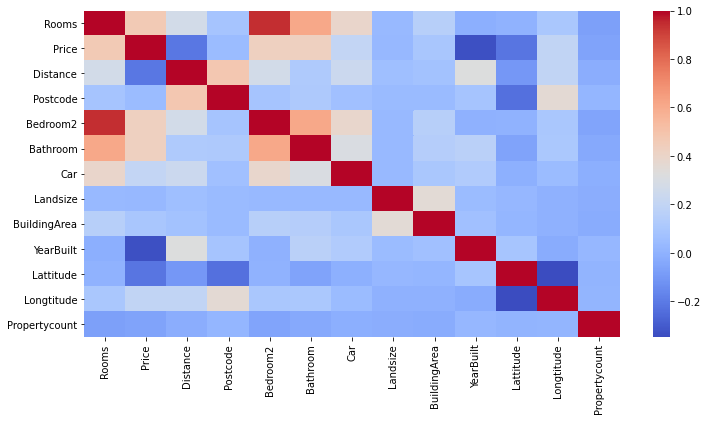

In [ ]:
# Then also create a heatmap of the correlation between the variables
#
target_cols = df.columns.to_list()
corr = df[target_cols].corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap='coolwarm')

In [ ]:
# Based on the correlation values, you decide how you want to handle missing data variables  
# – fill in with mean or remove missing rows or drop that variable.
#
df.drop(columns = ['Bedroom2','Bathroom'], inplace = True) # drop because high correlation with rooms
df.drop(columns = ['BuildingArea','YearBuilt'], inplace = True) #drop because too many missing values
df.drop('Postcode',axis=1, inplace = True) #drop because related to lat and long
df.dropna(subset=['Lattitude', 'Longtitude'], inplace = True) # drop missing lat/long rows
df.isna().sum()

Rooms               0
Price            5888
Distance            0
Car               778
Landsize         3860
Lattitude           0
Longtitude          0
Propertycount       0
dtype: int64

In [ ]:
# fill price/car/landsize with mean
df.Price.fillna(round(df.Price.mean(),0), inplace = True)
df.Car.fillna(df.Car.mean(), inplace = True)
df.Landsize.fillna(df.Landsize.mean(), inplace = True)

In [ ]:
df.isna().sum() #check again for the missing value

Rooms            0
Price            0
Distance         0
Car              0
Landsize         0
Lattitude        0
Longtitude       0
Propertycount    0
dtype: int64

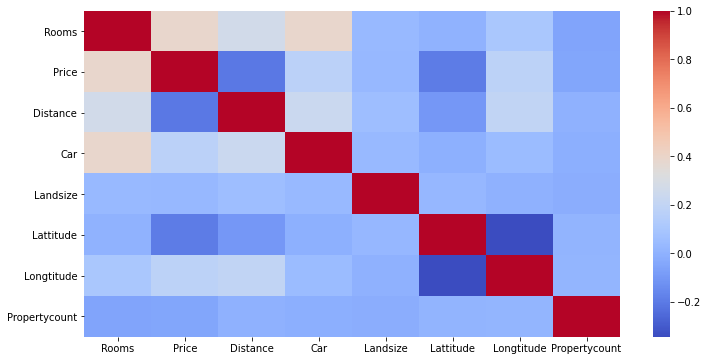

In [ ]:
# check correlation again
target_cols = df.columns.to_list()
corr = df[target_cols].corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap='coolwarm')

3.	Build the model using scikit-learn libraries. Display your y-intercept and also nicely display your coefficients. 

In [ ]:
df.shape

(26881, 8)

In [ ]:
X = df.drop('Price', axis = 1).values
y = df.Price.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=42)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Display y-interncept
print(lr.intercept_)

-141434479.06084907


In [ ]:
# Display coefficients
print(lr.coef_)

[ 2.75504421e+05 -3.31629792e+04  4.62791716e+04  5.85284501e+00
 -1.20628136e+06  6.64596269e+05 -2.17759034e+00]


4.	Make predictions against your test data. Show meaningful metrics to show how good your prediction is? (5 pts)

In [ ]:
# predict on test data
y_pred = lr.predict(X_test)

In [ ]:
lr.score(X,y)

0.33300537097923855

In [ ]:
# show meaning ful metrics 
print(f'Mean Absolute Error is {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Mean Squared Error is {metrics.mean_squared_error(y_test, y_pred)}')
print(f'Root Mean Squared Error is {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')

Mean Absolute Error is 317328.05403775506
Mean Squared Error is 221412264148.32568
Root Mean Squared Error is 470544.6462859031


5.	Can you improve your errors? How? Show your work. [Hint: Think validation set] (5 pts)

In [ ]:
X_train_v, X_rem, y_train_v, y_rem= train_test_split(X,y,test_size = 0.25, random_state=42)
X_valid, X_test_v, y_valid, y_test_v= train_test_split(X_rem, y_rem,test_size = 0.5, random_state =101) # break remain 50-50

In [ ]:
# scale three training dataset
scaler_v = StandardScaler()
scaled_X_train_v = scaler_v.fit_transform(X_train_v) #only use scale from X_train, then transform all datasets
scaled_X_valid = scaler_v.transform(X_valid)
scaled_X_test_v = scaler_v.transform(X_test_v)

In [ ]:
lr2 = Ridge(alpha=100)
lr2.fit(scaled_X_train_v, y_train_v)
y_pred2 = lr2.predict(scaled_X_valid)
print(f'Mean Absolute Error is {metrics.mean_absolute_error(y_valid, y_pred2)}')

Mean Absolute Error is 317813.42769394594


In [ ]:
lr3 = Ridge(alpha=1)
lr3.fit(scaled_X_train_v, y_train_v)
y_pred3 = lr3.predict(scaled_X_valid)
print(f'Mean Absolute Error is {metrics.mean_absolute_error(y_valid, y_pred3)}')

Mean Absolute Error is 317923.9667611539


In [ ]:
# lr3 is slightly better than lr2
y_final = lr3.predict(scaled_X_test_v)

In [ ]:
print(f'Mean Absolute Error is {metrics.mean_absolute_error(y_test_v, y_final)}')
print(f'Mean Squared Error is {metrics.mean_squared_error(y_test_v, y_final)}')
print(f'Root Mean Squared Error is {np.sqrt(metrics.mean_squared_error(y_test_v, y_final))}')

Mean Absolute Error is 316729.58640063176
Mean Squared Error is 212324742949.23282
Root Mean Squared Error is 460787.09069290647


With the validation dataset, I can use different method to build the model, then predict on the test dataset when I have a lower error model. And, the result did shows better.